**PACKAGES**

In [19]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

**PART 1:** Loading, converting and cleaning of the data.

Convert the dataset into a pandas dataframe. The column utc_timestamp will be the index of the dataframe I'm going to use.

In [20]:
wind_enenrgy = pd.read_csv('WindEnergy.csv', sep=',', parse_dates=['utc_timestamp'], index_col='utc_timestamp')
wind_enenrgy = wind_enenrgy.asfreq('d') 
wind_enenrgy

,wind_generation_actual,wind_capacity,temperature
utc_timestamp,,,
2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908
...,...,...,...
2019-12-26 00:00:00+00:00,132739.0,50424.125,2.790
2019-12-27 00:00:00+00:00,146590.0,50427.000,1.327
2019-12-28 00:00:00+00:00,159126.0,50427.292,-1.441


Looking more into the dataset we see that it has three different features.
- wind_generation_actual: power generated by the turbines in Germany on that day;
- temperature: mean temperature on that day;
-  wind_Capacity: total amunt of power generate through a time interval

Now, we want to clear the dataset

In [21]:
wind_enenrgy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2017-01-01 00:00:00+00:00 to 2019-12-30 00:00:00+00:00
Freq: D
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   wind_generation_actual  1094 non-null   float64
 1   wind_capacity           1094 non-null   float64
 2   temperature             1094 non-null   float64
dtypes: float64(3)
memory usage: 34.2 KB


In [22]:
wind_enenrgy.isnull().sum()

wind_generation_actual    0
wind_capacity             0
temperature               0
dtype: int64

The dataset is clean and without null values, there is no need to preprocessing to the data as it is right now. 
The next move is to capture some information about the individual features.

In [23]:
wind_enenrgy.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
wind_generation_actual,1094.0,305819.77,205728.86,16482.00,148552.75,254332.50,412570.50,998899.00
wind_capacity,1094.0,45066.02,4315.84,37149.13,41447.94,46073.00,49203.00,50452.00
temperature,1094.0,10.05,7.74,-9.36,3.58,10.05,16.57,28.24


We can see that the wind_generation_actual is the feature with the highest values, while the temperature is the lowest one.

**PART 2:** Exploring the dataset with descriptive statistics and frequency analysis. Use appropriate graphs to visualise the data at hand

At the fisrt, we're going to analyze the single features in search of informations, patterns and characteristics of which the dataset is made of. 

For time series data, the most often used graph to start is the *Time graph*. In this graph, observations are plotted against observation time, with consecutive observations joined by straight lines.

**A. Wind_generation_actual**

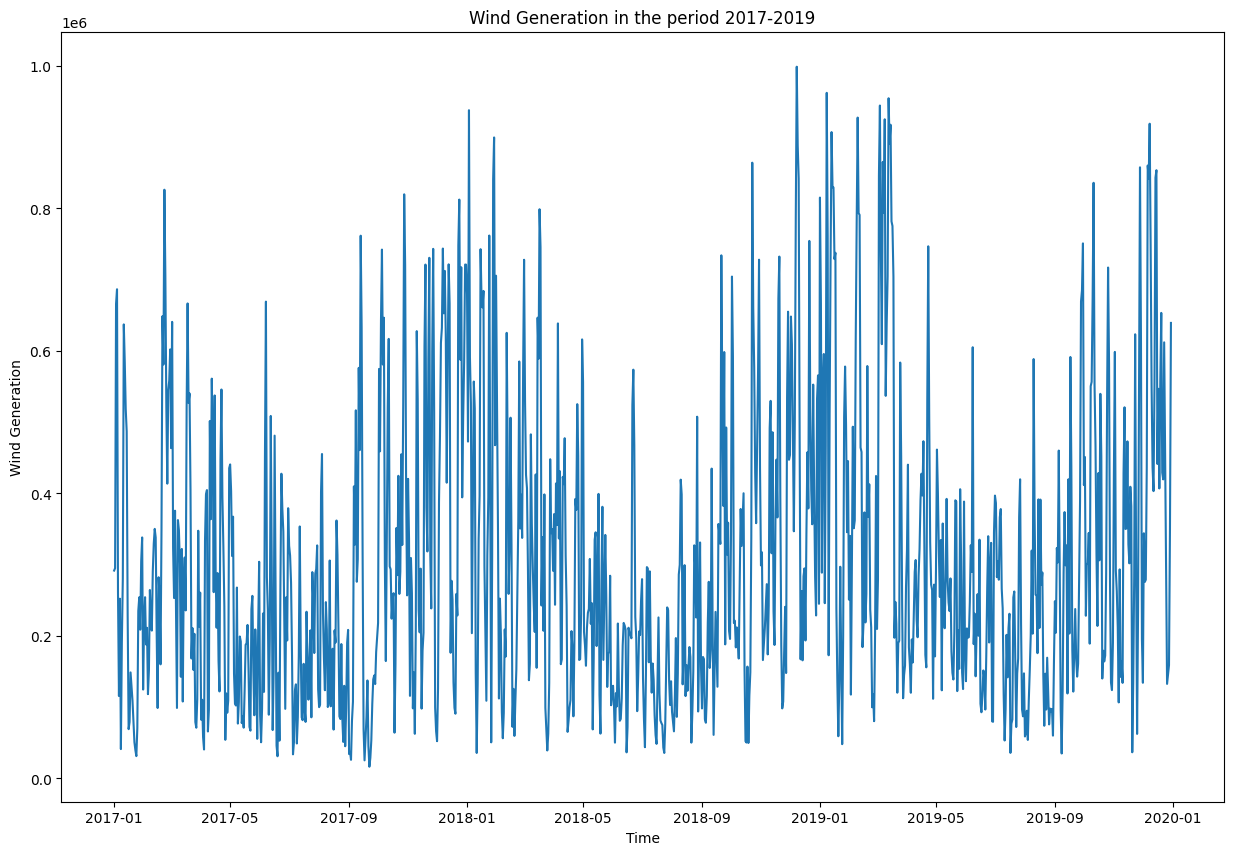

In [24]:
plt.figure(figsize=(15,10))
sns.lineplot(data= wind_enenrgy, x='utc_timestamp', y='wind_generation_actual')
plt.ylabel("Wind Generation")
plt.xlabel("Time")
plt.title("Wind Generation in the period 2017-2019")
plt.show()

From here it can be seen that in all three years, the summer season (May to September) has the lowest wind generation while the winter season (September to April) has the highest. There is a certain seasonality in the data, visible from the recurring patterns, and probably also a cyclical component.

**B. Wind_Capacity**

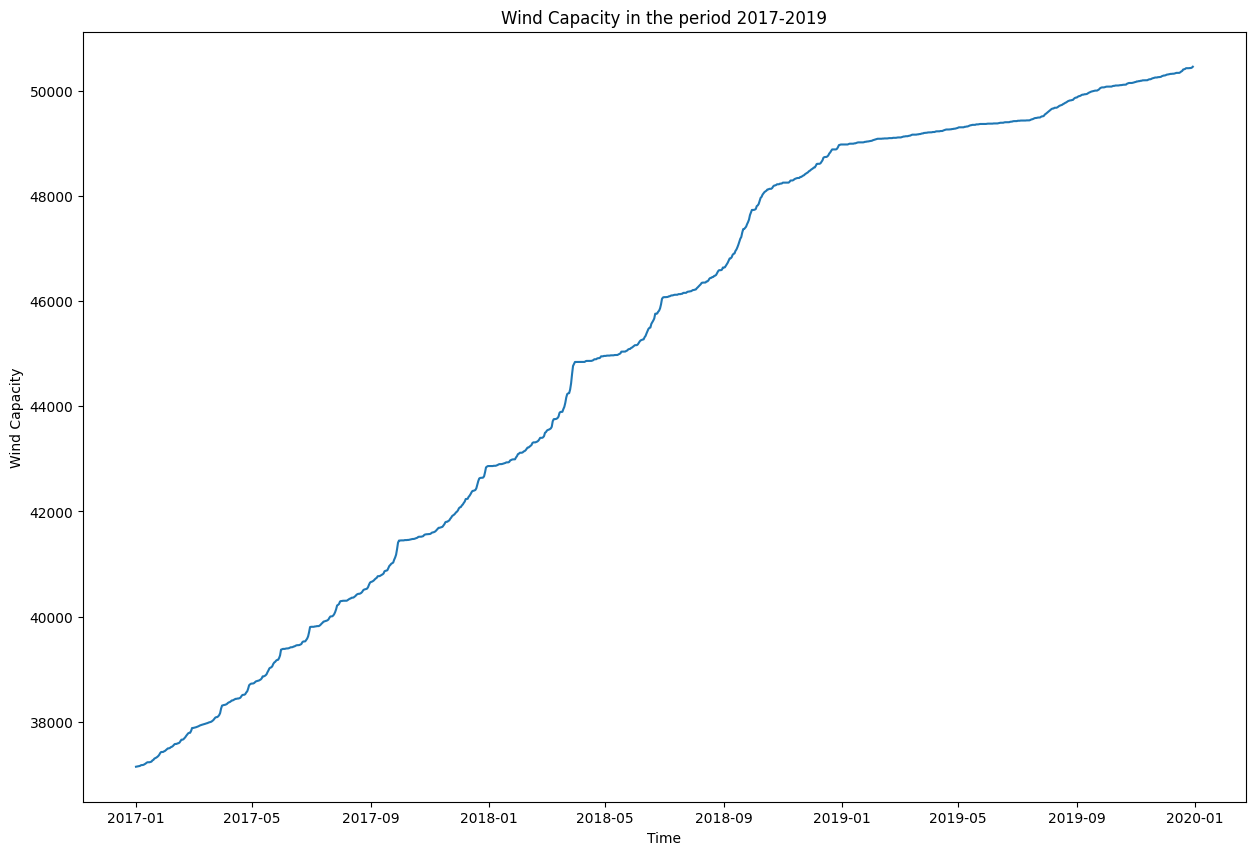

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(data=wind_enenrgy, x='utc_timestamp', y='wind_capacity')
plt.ylabel("Wind Capacity")
plt.xlabel("Time")
plt.title("Wind Capacity in the period 2017-2019")
plt.show()


From this graph, however, it can be seen that there is a recurring 'wave' pattern that starts fairly slowly in 2017, but laver, between the ylast two years, the waves become a little longer and higher.

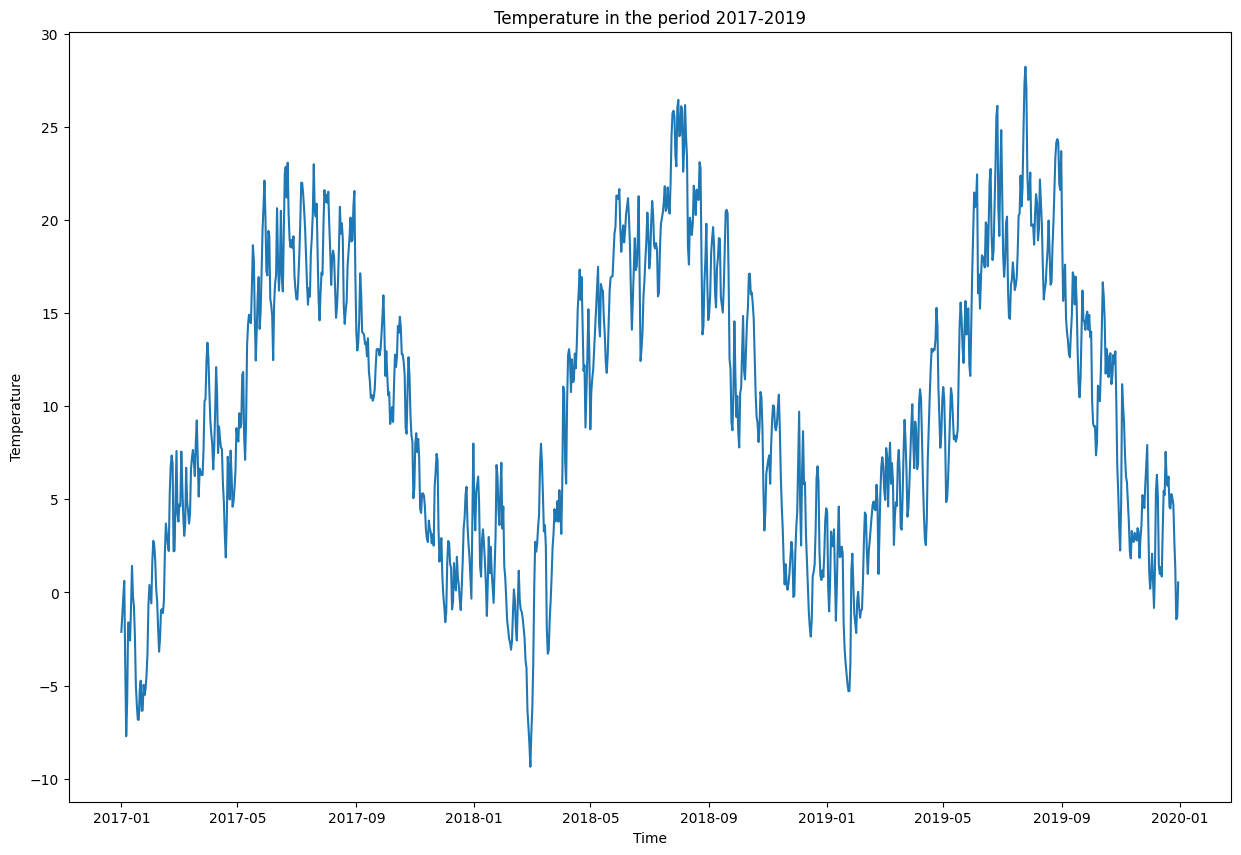

In [26]:
plt.figure(figsize=(15,10))
sns.lineplot(data = wind_enenrgy, x='utc_timestamp', y='temperature')
plt.ylabel("Temperature")
plt.xlabel("Time")
plt.title("Temperature in the period 2017-2019")
plt.show()

This graph shows the temperature trend over the last three years, highlighting a recurring seasonal pattern, which can be seen from the three ‘peaks’. Each year, temperatures are lowest in the winter months, gradually rise in the spring until they peak in the summer, then fall again in the autumn and return to their lowest values in the winter. This cycle repeats itself regularly, indicating a marked climatic seasonality.

Next, we will analyse the distribution of the variables by means of a *histogram* graph

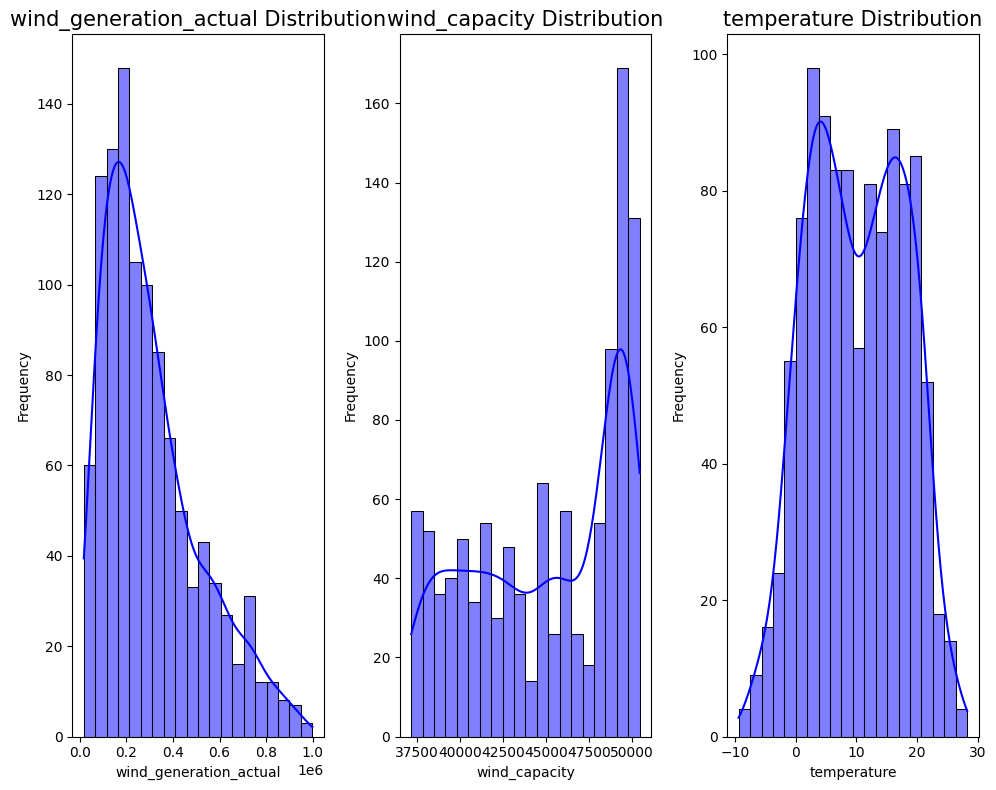

In [36]:
variables = wind_enenrgy.columns
n_vars = len(variables)
fig, axes = plt.subplots(1,3,figsize=(10,8))
for i, var in enumerate(variables):
    sns.histplot(wind_enenrgy[var], bins=20, kde=True, ax=axes[i], color='Blue')
    axes[i].set_title(f'{var} Distribution', fontsize=15)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

Next, we visualise the distribution of variables and the presence of outliers using a *Boxplot* and *Violinplot* graph.

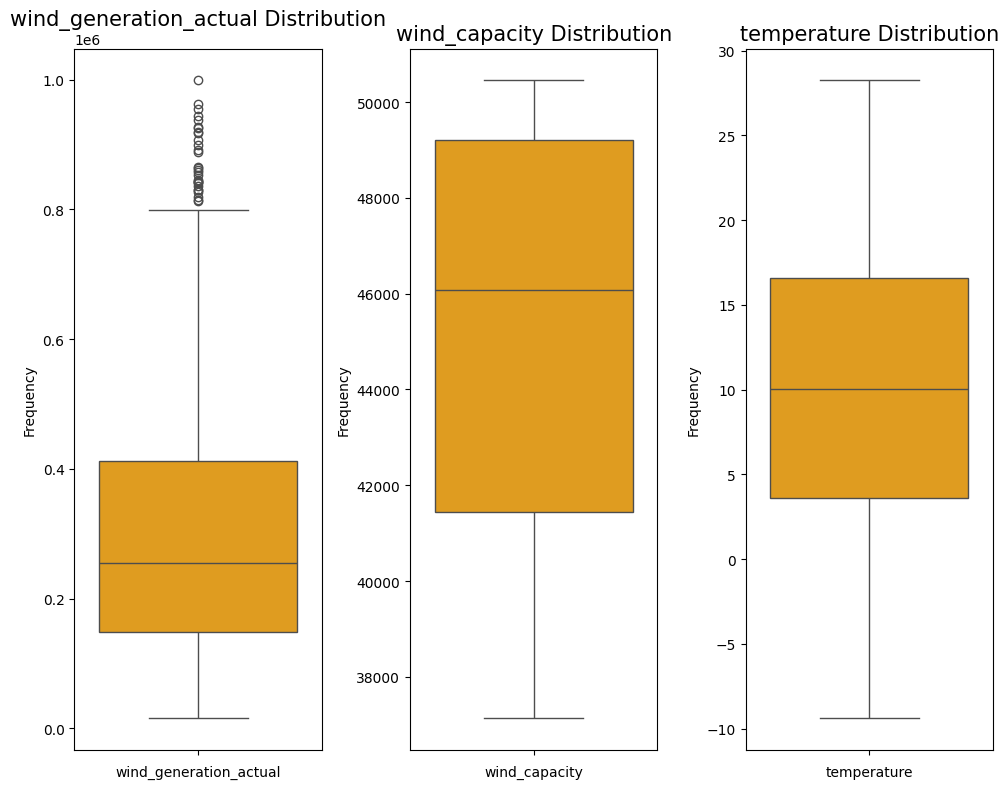

In [37]:
fig, axes = plt.subplots(1,3,figsize=(10,8))
for i, var in enumerate(variables):
    sns.boxplot(y=wind_enenrgy[var], ax=axes[i], color='Orange')
    axes[i].set_title(f'{var} Distribution', fontsize=15)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

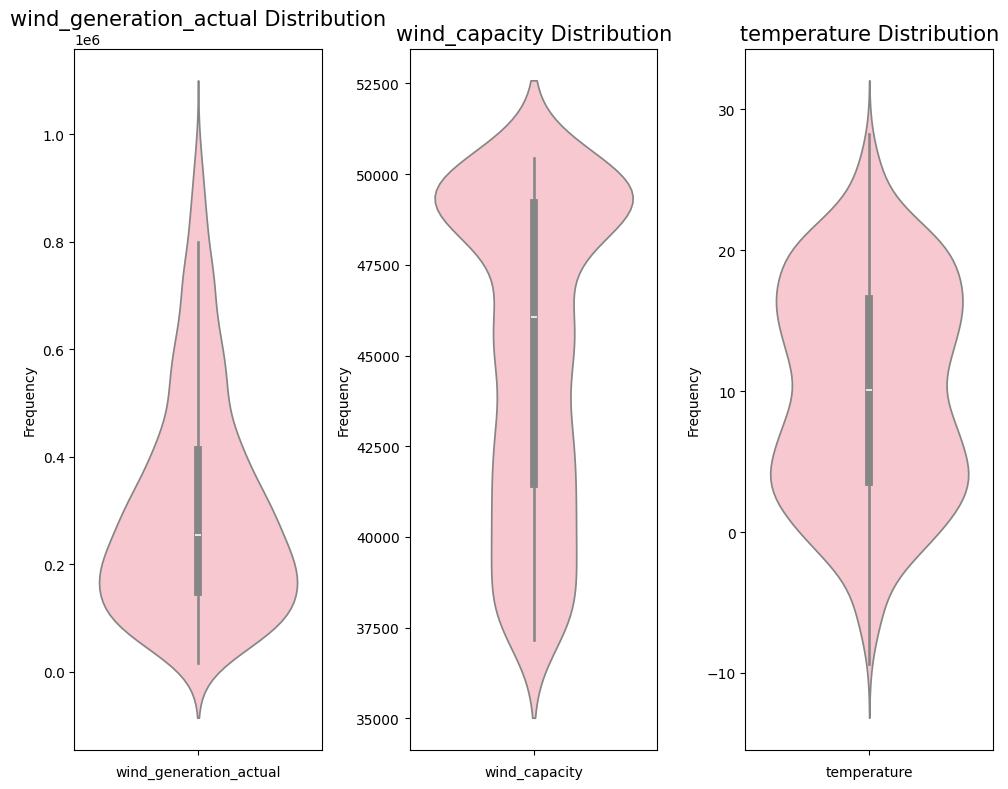

In [38]:
fig, axes = plt.subplots(1,3,figsize=(10,8))
for i, var in enumerate(variables):
    sns.violinplot(y=wind_enenrgy[var], ax=axes[i], color='Pink')
    axes[i].set_title(f'{var} Distribution', fontsize=15)
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

We see that there are some outliers in the wind generation. Let's investigate more by calculating the *IQR* and then determine the total numbers of outliers.

In [34]:
Q1_py = np.quantile(wind_enenrgy.wind_generation_actual,0.25)
Q3_py = np.quantile(wind_enenrgy.wind_generation_actual,0.75)
IQR = Q3_py-Q1_py
Lower_Fence = Q1_py - 1.5*IQR
Upper_Fence = Q3_py + 1.5*IQR

T = []
for i in wind_enenrgy.wind_generation_actual:
    exp1 = i < Lower_Fence
    exp2 = i > Upper_Fence
    if exp1 or exp2:
       temp = i
       T.append(temp)
print('The total number of outliers is ', len(T), 'which is rougly', round(len(T)/len(wind_enenrgy)*100,2), '% of the dataset')

The total number of outliers is  30 which is rougly 2.74 % of the dataset


Another interesting thing to see is if there is correlations between the variables with the *Heatmap*. This will be useful in determining the type of model we are going to use to forecast data.

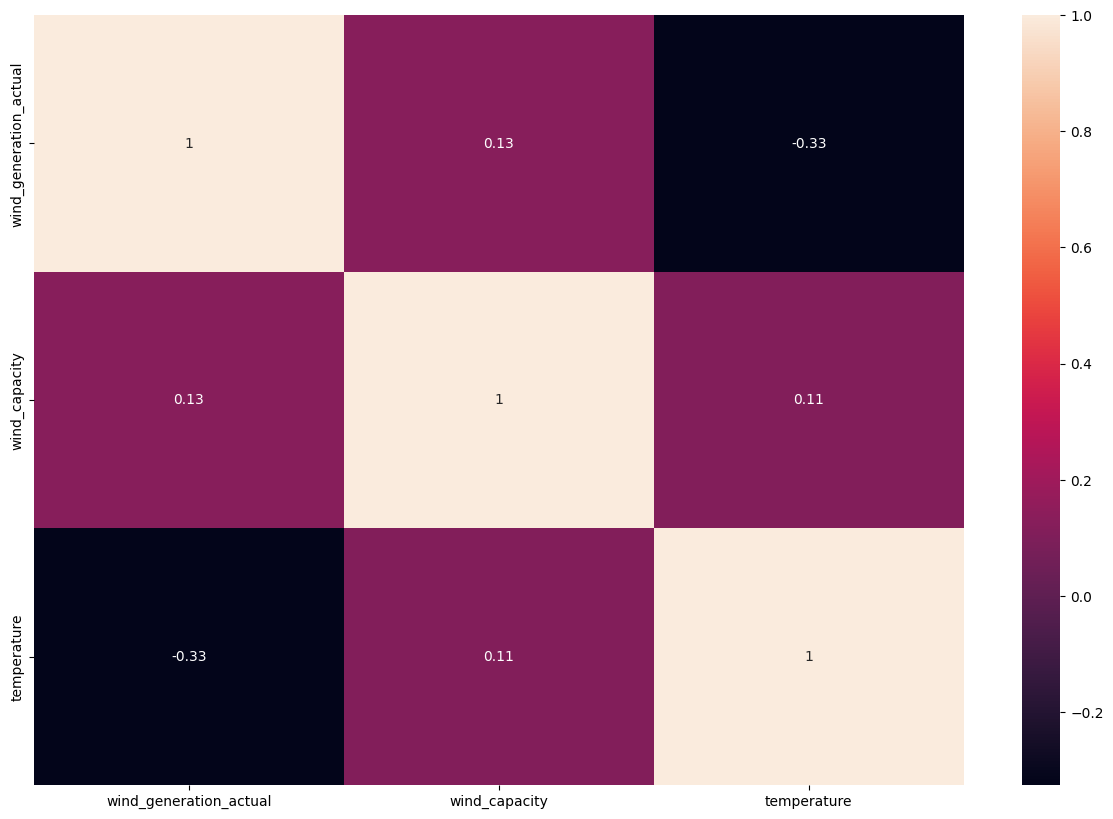

In [35]:
plt.figure(figsize=(15,10))
corr = wind_enenrgy.corr()
sns.heatmap(corr,annot=True)
plt.show()

It's possible to see that the data does not present strong correlation between the features. There is a slighly negative correlation between the wind_generation and the temperature. 